In [1]:
from holisticai.benchmark import BiasMitigationBenchmark

Select the benchmark task type and the bias mitigation type

In [ ]:
benchmark = BiasMitigationBenchmark("binary_classification", "preprocessing")

Check the available datasets and mitigators

In [3]:
benchmark.available_settings()

Available datasets for binary_classification: ['compas_two_year_recid_sex', 'compas_two_year_recid_race', 'compas_is_recid_sex', 'compas_is_recid_race', 'adult_sex', 'adult_race', 'german_credit_sex', 'clinical_records_sex', 'bank_marketing_marital', 'law_school_sex', 'law_school_race', 'diabetes_sex', 'diabetes_race', 'census_kdd_sex', 'acsincome_sex', 'acsincome_race', 'acspublic_sex', 'acspublic_race', 'acsemployment_race', 'acsemployment_sex', 'acsemployment_disability', 'acsmobility_race', 'acsmobility_sex', 'acsmobility_disability', 'acstraveltime_race', 'acstraveltime_sex', 'acstraveltime_disability', 'mw_small_race', 'mw_small_sex', 'mw_medium_race', 'mw_medium_sex']
Available mitigators for binary_classification with preprocessing: ['CorrelationRemover', 'DisparateImpactRemover', 'LearningFairRepresentation', 'Reweighing']


Get the actual benchmark results

In [4]:
benchmark.get_table()

,CorrelationRemover,Reweighing,DisparateImpactRemover,LearningFairRepresentation
,,,,
Mean Score,0.886568,0.875088,0.864556,0.863185
Std Score,0.058084,0.060448,0.075434,0.079973
Mean Time,1.622713,4.598107,33.054083,16.696009
acsincome_race,0.876319,0.839437,0.842387,0.731448
acsincome_sex,0.866683,0.863420,0.867943,0.835478
acspublic_race,0.876379,0.876459,0.874702,0.851131
acspublic_sex,0.866163,0.860615,0.857040,0.838606
adult_race,0.922202,0.878467,0.884868,0.869641
adult_sex,0.877477,0.875332,0.666232,0.878220


Visualize the actual benchmark results

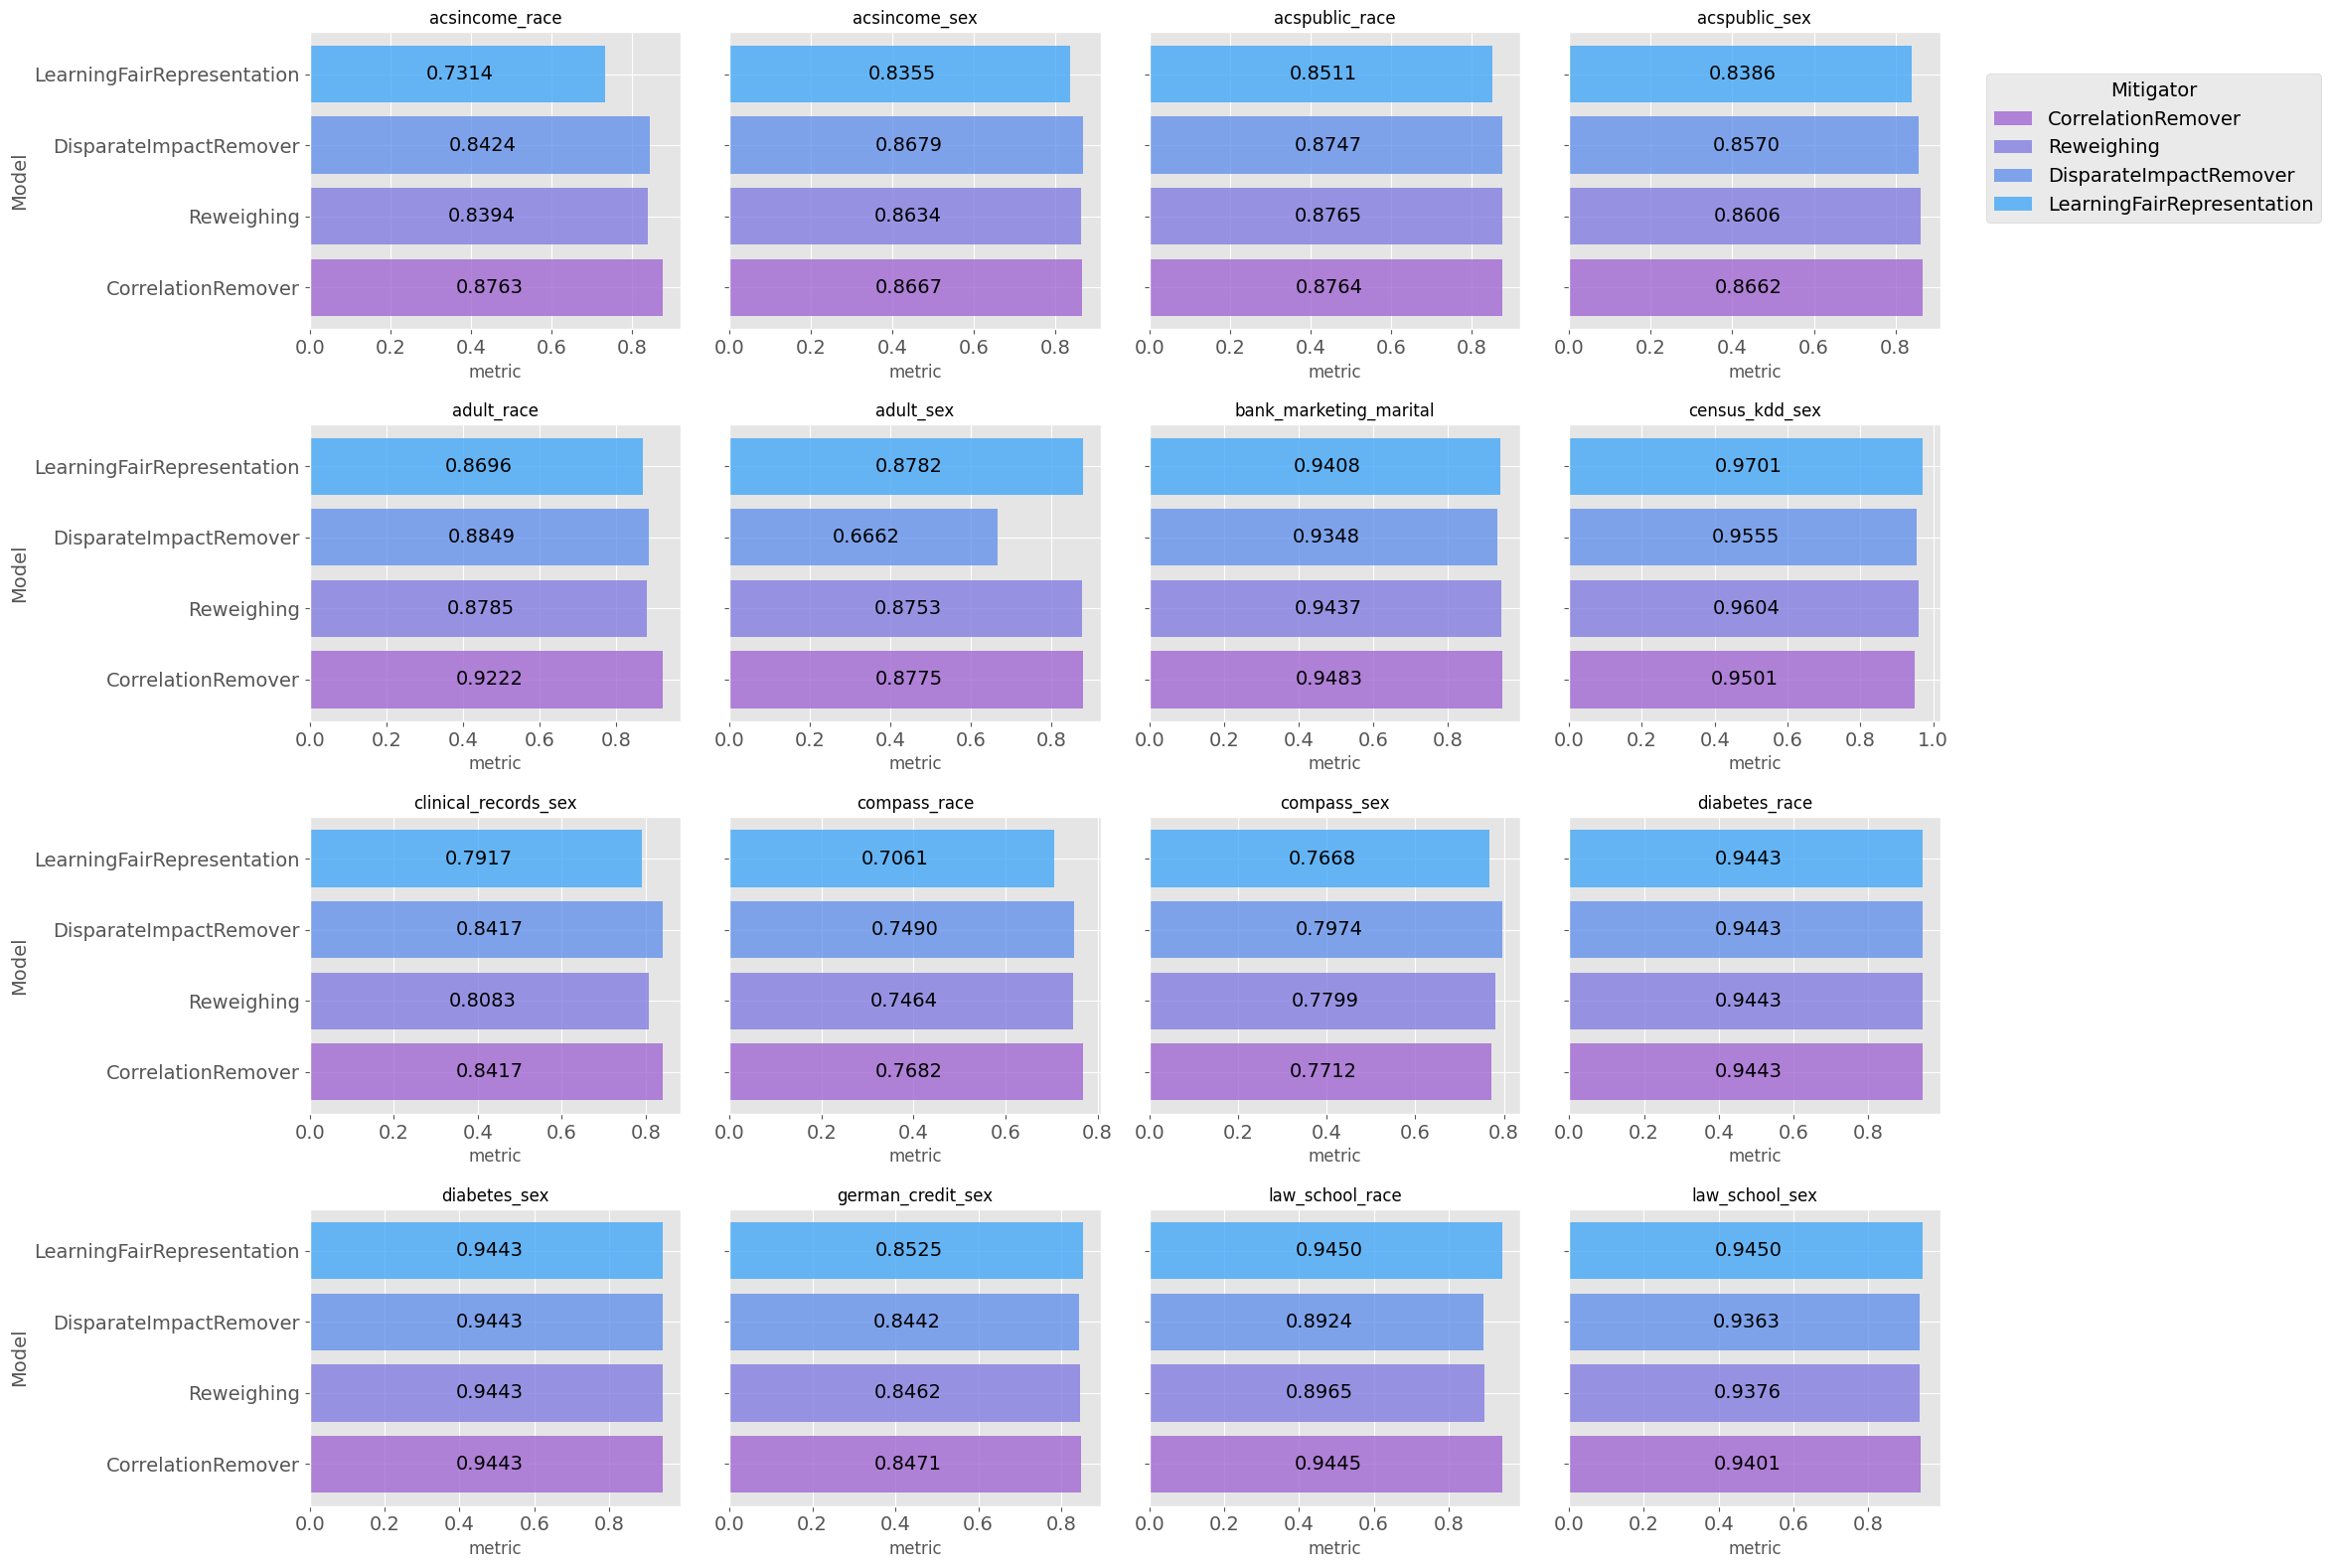

In [5]:
benchmark.get_plot(output_path="output.png")

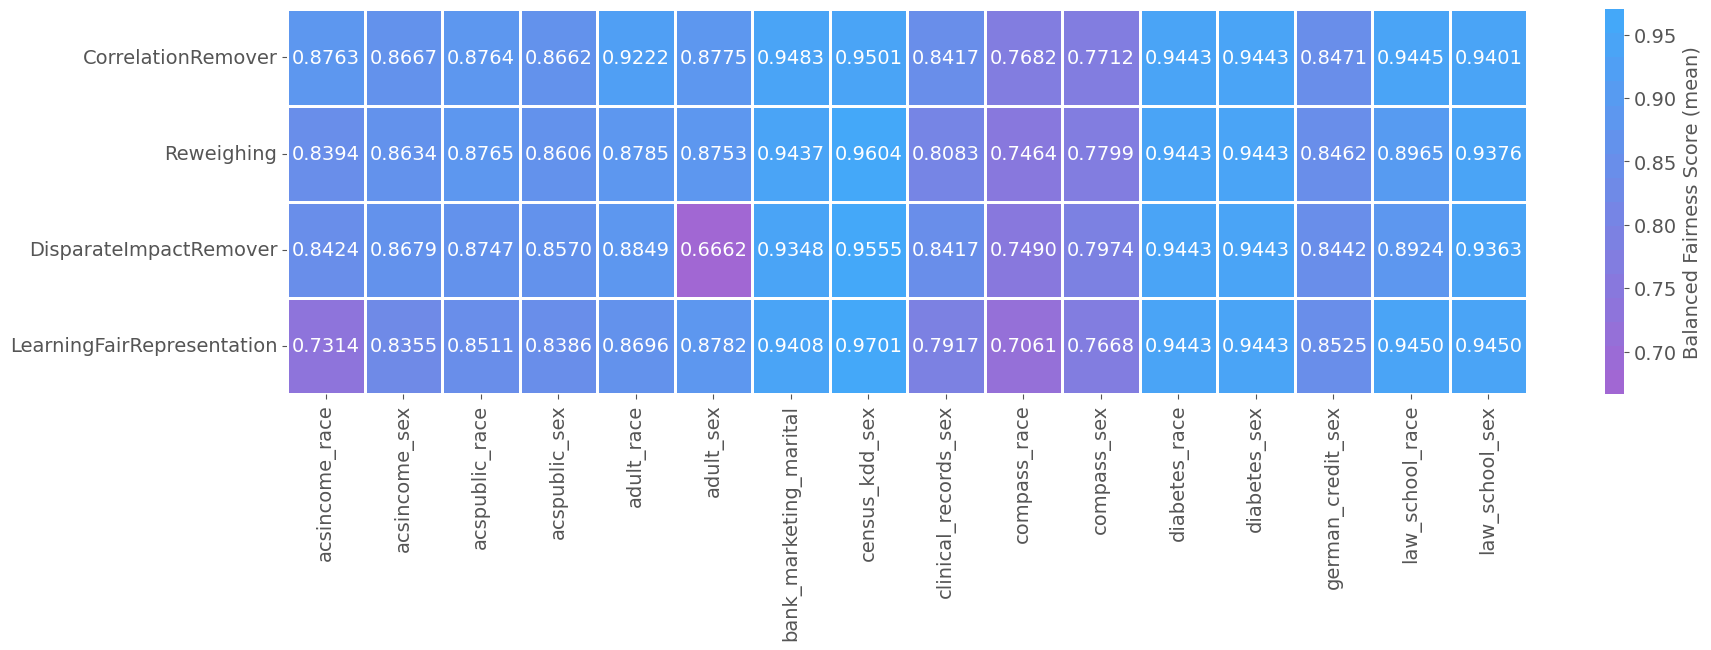

In [6]:
benchmark.get_heatmap(fig_size=(20, 5))

Create your own mitigator

In [4]:
from __future__ import annotations

import numpy as np
from typing import Optional
from holisticai.utils.transformers.bias import BMPreprocessing as BMPre

class MyMitigator(BMPre):
    def __init__(self):
        self.sample_weight = None

    def fit(
        self,
        y: np.ndarray,
        group_a: np.ndarray,
        group_b: np.ndarray,
        sample_weight: Optional[np.ndarray] = None,
    ):
        # Simple logic to assign weights based on group membership
        self.sample_weight = np.ones_like(y, dtype=np.float32)
        group_mask = (group_a == 1) & (group_b == 0)
        self.sample_weight[group_mask] = 2.0  # Assign higher weight to this group
        
        return self

    def transform(self, X: np.ndarray):
        return X  # If needed, apply some transformation to X

    def fit_transform(
        self,
        X: np.ndarray,
        y: np.ndarray,
        group_a: np.ndarray,
        group_b: np.ndarray,
        sample_weight: Optional[np.ndarray] = None,
    ):
        return self.fit(y, group_a, group_b, sample_weight).transform(X)

Evaluate your mitigator in the benchmark setup

In [5]:
my_mitigator = MyMitigator()

my_results = benchmark.run(custom_mitigator=my_mitigator)
my_results

: 

Do you have nice results? Share them with us!

In [9]:
benchmark.submit()

True

Create and evaluate your own dataset

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from holisticai.datasets import Dataset

np.random.seed(42)

# Prepare the data (preprocessing)
iris = datasets.load_iris()
iris.keys()

X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.Series(iris['target'], name='target')
y = y.apply(lambda x: 1 if x == 1 else 0) # binary target variable

protected = np.random.choice(['a', 'b'], X.shape[0]) # illustrative protected attribute
group_a = pd.Series(protected == 'a', name='group_a') # binary group_a attribute
group_b = pd.Series(protected == 'b', name='group_b') # binary group_b attribute

# Create a custom dataset object
my_dataset = Dataset(X=X, y=y, group_a=group_a, group_b=group_b)

# Run the benchmark with the custom dataset
my_results = benchmark.run(custom_dataset=my_dataset)
my_results

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


mitigator,LearningFairRepresentation,DisparateImpactRemover,Reweighing,CorrelationRemover
Mean Score,0.85000,0.786111,0.775000,0.763889
Std Score,0.00000,0.000000,0.000000,0.000000
Mean Time,0.74646,0.018452,0.024106,0.369011
Custom Dataset,0.85000,0.786111,0.775000,0.763889


Evaluate your own dataset and mitigator

In [8]:
my_mitigator = MyMitigator()
my_dataset = Dataset(X=X, y=y, group_a=group_a, group_b=group_b)

my_results = benchmark.run(custom_mitigator=my_mitigator, custom_dataset=my_dataset)
my_results

mitigator,LearningFairRepresentation,DisparateImpactRemover,Reweighing,MyMitigator,CorrelationRemover
Mean Score,0.850000,0.786111,0.775000,0.7750,0.763889
Std Score,0.000000,0.000000,0.000000,0.0000,0.000000
Mean Time,0.212112,0.015482,0.015152,0.0109,0.008937
Custom Dataset,0.850000,0.786111,0.775000,0.7750,0.763889
